In [1]:
# Please execute this cell
import sciprog

# Exam -  Thu 23, Jan 2020

**Scientific Programming - Data Science @ University of Trento**

## [Download exercises and solution](../../../_static/generated/sciprog-ds-2020-01-23-exam.zip)

## Introduction

* **Taking part to this exam erases any vote you had before**


### What to do

1) Download  `sciprog-ds-2020-01-23-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```
sciprog-ds-2020-01-23-FIRSTNAME-LASTNAME-ID
   data
       db.mm
       proof.txt
   
   exam-2020-01-23.ipynb   
   digi_list.py
   digi_list_test.py
   bin_tree.py
   bin_tree_test.py
   jupman.py
   sciprog.py
            
            
```

2) Rename `sciprog-ds-2020-01-23-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `sciprog-ds-2020-01-23-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. Every exercise should take max 25 mins. If it takes longer, leave it and try another exercise.

4) When done:

- if you have unitn login:  zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)
  
- If you don't have unitn login: tell instructors and we will download your work manually
 


## Part A

Open Jupyter and start editing this notebook `exam-2020-01-23.ipynb`





## Metamath 

[Metamath](http://us.metamath.org) is a language that can express theorems, accompanied by proofs that can be verified by a computer program.  Its website lets you browse from [complex theorems](http://us.metamath.org/mm_100.html) up to the most [basic axioms](http://us.metamath.org/mpeuni/mmtheorems1.html#mm5s) they rely on to be proven .

For this exercise, we have two files to consider, `db.mm` and `proof.txt`. 

- `db.mm` contains the description of a simple algebra where you can only add zero to variables
- `proof.txt` contains the awesome proof that... any variable is equal to itself

The purpose of this exercise is to visualize the steps of the proof as a graph, and visualize statement frequencies.

<div class="alert alert-warning">

**DISCLAIMER: No panic** !

You **DO NOT** need to understand _any_ of the mathematics which follows. Here we are _only_ interested in parsing the data and visualize it

</div>


### Metamath db

First you will load `data/db.mm` and parse text file into Python, here is the full content:

```
$( Declare the constant symbols we will use $)
    $c 0 + = -> ( ) term wff |- $.
$( Declare the metavariables we will use $)
    $v t r s P Q $.
$( Specify properties of the metavariables $)
    tt $f term t $.
    tr $f term r $.
    ts $f term s $.
    wp $f wff P $.
    wq $f wff Q $.
$( Define "term" and "wff" $)
    tze $a term 0 $.
    tpl $a term ( t + r ) $.
    weq $a wff t = r $.
    wim $a wff ( P -> Q ) $.
$( State the axioms $)
    a1 $a |- ( t = r -> ( t = s -> r = s ) ) $.
    a2 $a |- ( t + 0 ) = t $.
$( Define the modus ponens inference rule $)
    ${
       min $e |- P $.
       maj $e |- ( P -> Q ) $.
       mp  $a |- Q $.
    $}
```

Format description:

- Each row is a _statement_
- Words are separated by spaces. Each word that appears in a _statement_ is called a _token_
- Tokens starting with dollar `$` are called _keywords_, you may have `$(`, `$)`, `$c`, `$v`, `$a`,`$f`,`${`,`$}`, `$.`
- Statements _may_ be identified with a unique arbitrary _label_, which is placed at the beginning of the row. For example, `tt`, `weq`, `maj` are all labels (in the file there are more):
    - `tt $f term t $.`
    - `weq $a wff t = r $.`
    - `maj $e |- ( P -> Q ) $.`
- Some rows have no label, examples:
    - `$c 0 + = -> ( ) term wff |- $.`
    - `$v t r s P Q $.`
    - `$( State the axioms $)`
    - `${`
    - `$}`
- in each row, after the first dollar _keyword_, you _may_ have an arbitratry _sequence_ of characters terminated by a dollar followed by a dot `$.`.  **You don't need to care about the sequence meaning!** Examples:
    - `tt $f term t $.` has sequence `term t`
    - `weq $a wff t = r $.` has sequence `wff t = r`
    - `$v t r s P Q $.` has sequence `t r s P Q`
    
Now implement function `parse_db` which scans the file line by line (it is a text file, so you can use [line files examples](https://sciprog.davidleoni.it/formats/formats-sol.html#1.-line-files)), parses ONLY rows with labels, and RETURN a dictionary mapping labels to remaining data in the row represented as a dictionary, formatted like this (showing here only first three labels): 

```python
{
 'a1':  {'keyword': '$a', 
         'sequence': '|- ( t = r -> ( t = s -> r = s ) )'
        },
 'a2':  {
         'keyword': '$a', 
         'sequence': '|- ( t + 0 ) = t'
        },
 'maj': {
         'keyword': '$e', 
         'sequence': '|- ( P -> Q )'
        },
 .
 .
 .
}
```


## A.1 Metamath db

In [2]:
def parse_db(filepath):
    
    ret = {}
    with open(filepath, encoding='utf-8') as f:
        line=f.readline().strip()
        while line != "":
            #print(line)                

            if line.startswith('$('):
                label = ''
                keyword = '$('
                sequence = ''
            elif line.split()[0].startswith('${'):
                label = ''
                keyword = '${'
                sequence = ''
            elif line.split()[0].startswith('$}'):
                label = ''
                keyword = '$}'
                sequence = ''
            elif line.split()[0].startswith('$'):
                label = ''
                keyword = line.split()[0]
                sequence = line.split()[1][:-2].strip()
            else:
                label = line.split(' $')[0].strip()
                keyword = line.split()[1]
                if line.endswith('$.'):
                    sequence = line.split(keyword)[1][1:-2].strip()                
            
            if label:
                ret[label] = {
                    'keyword' : keyword,
                    'sequence' : sequence
                }
                #print('   DEBUG: FOUND', label, ':', ret[label])
            #else:
                #print('   DEBUG: DISCARDED')
            line=f.readline().strip()
    return ret
    

db_mm = parse_db('data/db.mm')

assert db_mm['tt'] == {'keyword': '$f', 'sequence': 'term t'}
assert db_mm['maj'] == {'keyword': '$e', 'sequence': '|- ( P -> Q )'}
# careful 'mp' label shouldn't have spaces inside !
assert 'mp' in db_mm
assert db_mm['mp'] == {'keyword': '$a', 'sequence': '|- Q'}


from pprint import pprint
#pprint(db_mm)

In [2]:
def parse_db(filepath):
    raise Exception('TODO IMPLEMENT ME !')

db_mm = parse_db('data/db.mm')

assert db_mm['tt'] == {'keyword': '$f', 'sequence': 'term t'}
assert db_mm['maj'] == {'keyword': '$e', 'sequence': '|- ( P -> Q )'}
# careful 'mp' label shouldn't have spaces inside !
assert 'mp' in db_mm
assert db_mm['mp'] == {'keyword': '$a', 'sequence': '|- Q'}


from pprint import pprint
#pprint(db_mm)

In [3]:
from pprint import pprint
print("************   EXPECTED OUTPUT:  ****************")
pprint(db_mm)

************   EXPECTED OUTPUT:  ****************
{'a1': {'keyword': '$a', 'sequence': '|- ( t = r -> ( t = s -> r = s ) )'},
 'a2': {'keyword': '$a', 'sequence': '|- ( t + 0 ) = t'},
 'maj': {'keyword': '$e', 'sequence': '|- ( P -> Q )'},
 'min': {'keyword': '$e', 'sequence': '|- P'},
 'mp': {'keyword': '$a', 'sequence': '|- Q'},
 'tpl': {'keyword': '$a', 'sequence': 'term ( t + r )'},
 'tr': {'keyword': '$f', 'sequence': 'term r'},
 'ts': {'keyword': '$f', 'sequence': 'term s'},
 'tt': {'keyword': '$f', 'sequence': 'term t'},
 'tze': {'keyword': '$a', 'sequence': 'term 0'},
 'weq': {'keyword': '$a', 'sequence': 'wff t = r'},
 'wim': {'keyword': '$a', 'sequence': 'wff ( P -> Q )'},
 'wp': {'keyword': '$f', 'sequence': 'wff P'},
 'wq': {'keyword': '$f', 'sequence': 'wff Q'}}


## A.2 Metamath proof

A proof file is made of steps, one per row. Each statement, in order to be proven, needs other steps to be proven until very basic facts called axioms are reached, which need no further proof (typically proofs in Metamath are shown in much shorter format, but here we use a more explicit way)

So a proof can be nicely displayed as a tree of the steps it is made of, where the top node is the step to be proven and the axioms are the leaves of the tree.

Complete content of `data/proof.txt`:

```
 1 tt            $f term t
 2 tze           $a term 0
 3 1,2 tpl       $a term ( t + 0 )
 4 tt            $f term t
 5 3,4 weq       $a wff ( t + 0 ) = t
 6 tt            $f term t
 7 tt            $f term t
 8 6,7 weq       $a wff t = t
 9 tt            $f term t
10 9 a2          $a |- ( t + 0 ) = t
11 tt            $f term t
12 tze           $a term 0
13 11,12 tpl     $a term ( t + 0 )
14 tt            $f term t
15 13,14 weq     $a wff ( t + 0 ) = t
16 tt            $f term t
17 tze           $a term 0
18 16,17 tpl     $a term ( t + 0 )
19 tt            $f term t
20 18,19 weq     $a wff ( t + 0 ) = t
21 tt            $f term t
22 tt            $f term t
23 21,22 weq     $a wff t = t
24 20,23 wim     $a wff ( ( t + 0 ) = t -> t = t )
25 tt            $f term t
26 25 a2         $a |- ( t + 0 ) = t
27 tt            $f term t
28 tze           $a term 0
29 27,28 tpl     $a term ( t + 0 )
30 tt            $f term t
31 tt            $f term t
32 29,30,31 a1   $a |- ( ( t + 0 ) = t -> ( ( t + 0 ) = t -> t = t ) )
33 15,24,26,32 mp  $a |- ( ( t + 0 ) = t -> t = t )
34 5,8,10,33 mp  $a |- t = t
```

Each line represents a step of the proof. Last line is the final goal of the proof.

Each line contains, in order:

- a step number at the beginning, starting from 1 (`step_id`) 
- _possibly_ a list of other step_ids, separated by commas, like `29,30,31` - they are references to previous rows
- label of the `db_mm` statement referenced by the step, like `tt`, `tze`, `weq` - that label must have been defined somewhere in `db.mm` file 
- statement type: a token starting with a dollar, like `$a`, `$f`
- a sequence of characters, like (for you they are just characters, **don't care about the meaning** !):
    - `term ( t + 0 )`
    - `|- ( ( t + 0 ) = t -> ( ( t + 0 ) = t -> t = t ) )`

Implement function `parse_proof`, which takes a `filepath` to the proof and RETURN a list of steps expressed as a dictionary, in this format (showing here only first 5 items): 

**NOTE**: referenced `step_ids` are **integer** numbers and they are the original ones from the file, meaning they start **from one**.

```
[
    {'keyword': '$f', 
     'label': 'tt', 
     'sequence': 'term t', 
     'step_ids': []},
    {'keyword': '$a', 
     'label': 'tze', 
     'sequence': 'term 0', 
     'step_ids': []},
    {'keyword': '$a',
     'label': 'tpl',
     'sequence': 'term ( t + 0 )',
     'step_ids': [1,2]},
    {'keyword': '$f', 
     'label': 'tt', 
     'sequence': 'term t', 
     'step_ids': []},
    {'keyword': '$a',
     'label': 'weq',
     'sequence': 'wff ( t + 0 ) = t',
     'step_ids': [3,4]},
     .
     .
     .
]
```

In [4]:
def parse_proof(filepath):
    
    ret = []

    with open(filepath, encoding='utf-8') as f:
        line=f.readline().strip()

        while line != "":
            
            step_id = int(line.split(' ')[0])            
            label = line.split('$')[0].strip().split(' ')[-1]            
            keyword = '$' + line.split('$')[1][:1]            
            sequence = line.split('$')[1][2:]            
            candidate_step_ids = line.split(' ')[1]        

            if candidate_step_ids != label:
                step_ids = [int(x) for x in line.split(' ')[1].split(',')]
            else:
                step_ids = []
            #print('deps =', deps)
        
            ret.append( {
                'step_ids': step_ids,
                'sequence': sequence,
                'label': label, 
                'keyword': keyword
            })

            line=f.readline().strip()
        return ret
    

proof = parse_proof('data/proof.txt')

assert proof[0] == {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []}
assert proof[1] == {'keyword': '$a', 'label': 'tze', 'sequence': 'term 0', 'step_ids': []}
assert proof[2] == {'keyword': '$a', 
                    'label': 'tpl',
                    'sequence': 'term ( t + 0 )',
                    'step_ids': [1, 2]}
assert proof[4] == {'keyword': '$a',
                    'label': 'weq',
                    'sequence': 'wff ( t + 0 ) = t',
                    'step_ids': [3,4]}
assert proof[33] == { 'keyword': '$a',
                      'label': 'mp',
                      'sequence': '|- t = t',
                      'step_ids': [5, 8, 10, 33]}

pprint(proof)

[{'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a', 'label': 'tze', 'sequence': 'term 0', 'step_ids': []},
 {'keyword': '$a',
  'label': 'tpl',
  'sequence': 'term ( t + 0 )',
  'step_ids': [1, 2]},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a',
  'label': 'weq',
  'sequence': 'wff ( t + 0 ) = t',
  'step_ids': [3, 4]},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a', 'label': 'weq', 'sequence': 'wff t = t', 'step_ids': [6, 7]},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a',
  'label': 'a2',
  'sequence': '|- ( t + 0 ) = t',
  'step_ids': [9]},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a', 'label': 'tze', 'sequence': 'term 0', 'step_ids': []},
 {'keyword': '$a',
  'label': 'tpl',
  'sequence': 'term

In [4]:
def parse_proof(filepath):
    raise Exception('TODO IMPLEMENT ME !')

proof = parse_proof('data/proof.txt')

assert proof[0] == {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []}
assert proof[1] == {'keyword': '$a', 'label': 'tze', 'sequence': 'term 0', 'step_ids': []}
assert proof[2] == {'keyword': '$a', 
                    'label': 'tpl',
                    'sequence': 'term ( t + 0 )',
                    'step_ids': [1, 2]}
assert proof[4] == {'keyword': '$a',
                    'label': 'weq',
                    'sequence': 'wff ( t + 0 ) = t',
                    'step_ids': [3,4]}
assert proof[33] == { 'keyword': '$a',
                      'label': 'mp',
                      'sequence': '|- t = t',
                      'step_ids': [5, 8, 10, 33]}

pprint(proof)

[{'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a', 'label': 'tze', 'sequence': 'term 0', 'step_ids': []},
 {'keyword': '$a',
  'label': 'tpl',
  'sequence': 'term ( t + 0 )',
  'step_ids': [1, 2]},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a',
  'label': 'weq',
  'sequence': 'wff ( t + 0 ) = t',
  'step_ids': [3, 4]},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a', 'label': 'weq', 'sequence': 'wff t = t', 'step_ids': [6, 7]},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a',
  'label': 'a2',
  'sequence': '|- ( t + 0 ) = t',
  'step_ids': [9]},
 {'keyword': '$f', 'label': 'tt', 'sequence': 'term t', 'step_ids': []},
 {'keyword': '$a', 'label': 'tze', 'sequence': 'term 0', 'step_ids': []},
 {'keyword': '$a',
  'label': 'tpl',
  'sequence': 'term

### Checking proof

If you've done everything properly, by executing following cells you should be be able to see nice graphs.

<div class="alert alert-warning">

**IMPORTANT: You do not need to implement anything!**

Just look if results match expected graphs

</div>

#### Overview plot

Here we only show step numbers using function `draw_proof` defined in `sciprog` library

In [5]:
from sciprog import draw_proof
# uncomment and check
#draw_proof(proof, db_mm, only_ids=True)  # all graph, only numbers


************************ EXPECTED COMPLETE GRAPH  **********************************


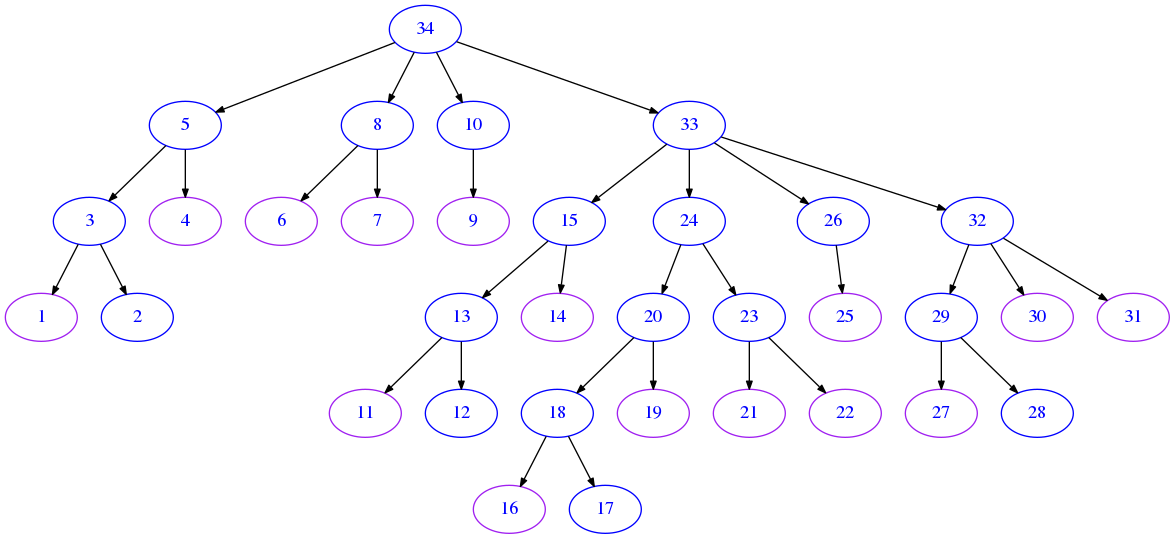

In [6]:
print()    
print('************************ EXPECTED COMPLETE GRAPH  **********************************')
draw_proof(proof, db_mm, only_ids=True)

#### Detail plot

Here we show data from both the `proof` and the `db_mm` we calculated earlier. To avoid having a huge graph we only focus on subtree starting from `step_id` 24.

To understand what is shown, look at node `20`:
- first line contains statement `wff ( t + 0 ) = t` taken from line 20 of `proof` file
- second line `weq: wff t = r` is taken from `db_mm`, and means rule labeled `weq` was used to derive the statement in the first line.

In [7]:
# uncomment and check
#draw_proof(proof, db_mm, step_id=24)      


************************* EXPECTED DETAIL GRAPH  *******************************


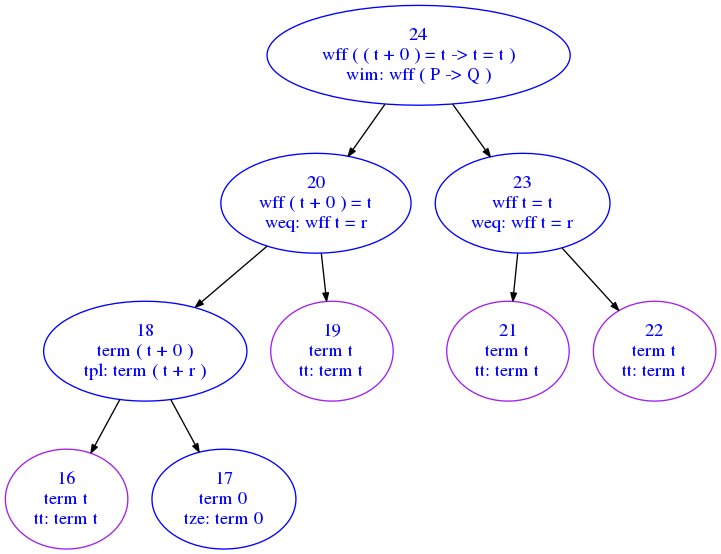

In [8]:
print()
print('************************* EXPECTED DETAIL GRAPH  *******************************')
draw_proof(proof, db_mm, step_id=24)


## A.3 Metamath top statements

We can measure the importance of theorems and definitions (in general, _statements_) by counting how many times they are referenced in proofs. 

### A3.1 histogram

Write some code to plot the histogram of _statement_ labels referenced by steps in `proof`, from most  to least frequently referenced. 

A label gets a count each time a step references another step with that label.

For example, in the subgraph above:

- `tt` is referenced 4 times, that is,  there are 4 steps referencing other steps which contain the label `tt`
- `weq` is referenced 2 times
- `tpl` and `tze` are referenced 1 time each
- `wim` is referenced 0 times (it is only present in the last node, which being the root node cannot be referenced by any step)

<div class="alert alert-warning">

**NOTE: the previous counts are just for the subgraph example.**

In your exercise, you will need to consider all the steps

</div>

### A3.2 print list

Below the graph, print the list of labels from most to least frequent, associating them to corresponding statement sequence taken from `db_mm`


In [9]:
# write here




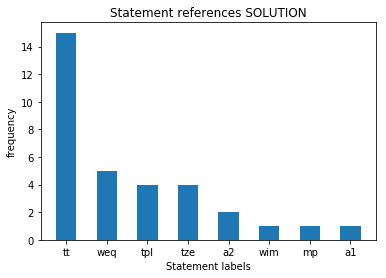

tt : 	 term t
weq : 	 wff t = r
tpl : 	 term ( t + r )
tze : 	 term 0
a2 : 	 |- ( t + 0 ) = t
wim : 	 wff ( P -> Q )
mp : 	 |- Q
a1 : 	 |- ( t = r -> ( t = s -> r = s ) )


In [10]:

# SOLUTION

import numpy as np
import matplotlib.pyplot as plt


freqs = {}
for step in proof:
    for step_id in step['step_ids']:
        label = proof[step_id-1]['label']
        if label not in freqs:
            freqs[label] = 1
        else:
            freqs[label] += 1
            
            
xs = np.arange(len(freqs.keys()))

coords = [(k, freqs[k]) for k in freqs ]

coords.sort(key=lambda c: c[1], reverse=True)

ys_in = [c[1] for c in coords]


plt.bar(xs, ys_in, 0.5, align='center')

plt.title("Statement references SOLUTION")
plt.xticks(xs, [c[0] for c in coords])

plt.xlabel('Statement labels')
plt.ylabel('frequency')

plt.show()

for c in coords:
    print(c[0], ':', '\t', db_mm[c[0]]['sequence'])

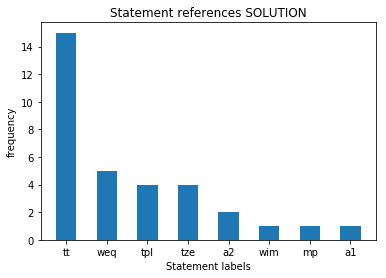

tt : 	 term t
weq : 	 wff t = r
tpl : 	 term ( t + r )
tze : 	 term 0
a2 : 	 |- ( t + 0 ) = t
wim : 	 wff ( P -> Q )
mp : 	 |- Q
a1 : 	 |- ( t = r -> ( t = s -> r = s ) )


## Part B

## B1 Theory

**Write the solution in separate `theory.txt` file**


### B1.1 my_fun

Given a list `L` of `n` elements, please compute the asymptotic computational complexity of the following function, explaining your reasoning.

```python
def my_fun(L):
    n = len(L)
    if n <= 1:
        return 1
    else:
        L1 = L[0:n//2]
        L2 = L[n//2:]
        a = my_fun(L1) + max(L1)
        b = my_fun(L2) + max(L2)
        return a + b 
```

### B1.2 differences

Briefly describe the main differences between the stack and queue data structures. Please provide an example of where you would use one or the other.


## B2 plus_one

**Open a text editor** and edit file `digi_lists.py`

You are given this class:

```python
class DigiList:
    """
        This is a stripped down version of the LinkedList as previously seen, 
        which can only hold integer digits 0-9
        
        NOTE: there is also a _last pointer

    """

```

Implement this method:

```python
    def plus_one(self):
        """ MODIFIES the digi list by summing one to the integer number it represents                    
            - you are allowed to perform multiple scans of the linked list
            - remember the list has a _last pointer
            
            - MUST execute in O(N) where N is the size of the list          
            - DO *NOT* create new nodes EXCEPT for special cases:
                a. empty list ( [] -> [5] )
                b. all nines ( [9,9,9] -> [1,0,0,0] )                     
            - DO *NOT* convert the digi list to a python int            
            - DO *NOT* convert the digi list to a python list            
            - DO *NOT* reverse the digi list            
        """
``` 

**Test**: `python3 -m unittest digi_list_test.PlusOneTest`

**Example**: 

In [11]:
from digi_list_sol import *

dl = DigiList()

dl.add(9)
dl.add(9)
dl.add(7)
dl.add(3)
dl.add(9)
dl.add(2)

print(dl)

DigiList: 2,9,3,7,9,9


In [12]:
dl.last()

9

In [13]:
dl.plus_one()

In [14]:
print(dl)

DigiList: 2,9,3,8,0,0


## B3 add_row

**Open a text editor** and edit file `bin_tree.py`. 

![tree iu9fidomnv](img/tree.jpg)

Now implement this method:

```python
    def add_row(self, elems):
        """ Takes as input a list of data and MODIFIES the tree by adding
            a row of new leaves, each having as data one element of elems,
            in order.
            
            - elems size can be less than 2*|leaves|
            - if elems size is more than 2*|leaves|, raises ValueError
            - for simplicity, you can assume assume self is a perfect 
              binary tree, that is a binary tree in which all interior nodes 
              have two children and all leaves have the same depth
            - MUST execute in O(n+|elems|)  where n is the size of the tree
            - DO *NOT* use recursion
            - implement it with a while and a stack (as a Python list)
        """        
```


**Test**: `python3 -m unittest bin_tree_test.AddRowTest`

**Example**: 

In [15]:
from bin_tree_sol import *
from bin_tree_test import bt

t = bt('a', 
            bt('b',
                    bt('d'), 
                    bt('e')),
            bt('c', 
                    bt('f'),                                    
                    bt('g')))

print(t)

a
├b
│├d
│└e
└c
 ├f
 └g


In [16]:
t.add_row(['h','i','j','k','l'])

In [17]:
print(t)

a
├b
│├d
││├h
││└i
│└e
│ ├j
│ └k
└c
 ├f
 │├l
 │└
 └g


In [18]:
import jupman;
import jupman
import digi_list_test
jupman.run(digi_list_test)
import bin_tree_test
jupman.run(bin_tree_test)


...................
----------------------------------------------------------------------
Ran 19 tests in 0.016s

OK
...............
----------------------------------------------------------------------
Ran 15 tests in 0.017s

OK
